<a href="https://colab.research.google.com/github/kr1k-boop/mini-project-ST-/blob/main/kmeans(skl)160k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/finale (2).csv', low_memory=False)

In [4]:
df.drop(['Unnamed: 0'], axis =1, inplace=True)

In [5]:
df.drop(['userid','playcount'], axis=1, inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.head()

,acousticness,name,danceability,tempo,loudness,energy,id,instrumentalness,key,liveness,popularity,speechiness,valence,year
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10.0,0.1510,0.0,0.0506,0.7790,1928.0
1,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,6KuQTIu1KoTTkLXKrwlLPV,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0
2,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,2YPbmbRIo7I1r9FAMqNjbZ,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0
3,0.604,Chapter 1.18 - Zamek kaniowski Seweryn Goszczy...,0.749,0.002150,-0.003805,0.2200,6L63VW0PibdM1HDSBoqnoM,0.000,5.0,0.1190,0.0,0.9290,0.8800,1928.0
4,0.995,Bebamos Juntos - Instrumental (Remasterizado) ...,0.781,0.002167,-0.002814,0.1300,6M94FkXd15sOAOQYRnWPN8,0.887,1.0,0.1110,0.0,0.0926,0.7200,1928.0


In [8]:
df.shape

(169909, 14)

In [9]:
df.dtypes

acousticness        float64
name                 object
danceability        float64
tempo               float64
loudness            float64
energy              float64
id                   object
instrumentalness    float64
key                 float64
liveness            float64
popularity          float64
speechiness         float64
valence             float64
year                float64
dtype: object

In [10]:
le = LabelEncoder()
n_id= le.fit_transform(df['id'])

In [11]:
df.insert(14, 'song_id', n_id)

In [12]:
df.drop('id', axis=1, inplace=True)

In [13]:
df.head(25)

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,0.563,10.0,0.1510,0.0,0.0506,0.7790,1928.0,140959
1,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,141059
2,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,60998
3,0.604,Chapter 1.18 - Zamek kaniowski Seweryn Goszczy...,0.749,0.002150,-0.003805,0.2200,0.000,5.0,0.1190,0.0,0.9290,0.8800,1928.0,141124
4,0.995,Bebamos Juntos - Instrumental (Remasterizado) ...,0.781,0.002167,-0.002814,0.1300,0.887,1.0,0.1110,0.0,0.0926,0.7200,1928.0,141446
5,0.990,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.210,0.001247,-0.003214,0.2040,0.908,11.0,0.0980,1.0,0.0424,0.0693,1928.0,141777
6,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002755,-0.004446,0.0823,0.852,1.0,0.0870,0.0,0.0382,0.0548,1928.0,154628
7,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002755,-0.004446,0.0823,0.852,1.0,0.0870,0.0,0.0382,0.0548,1928.0,161558
8,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.313,0.002730,-0.004257,0.0955,0.864,1.0,0.0899,0.0,0.0362,0.0676,1928.0,58386
9,0.990,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002674,-0.004113,0.1370,0.857,11.0,0.8770,0.0,0.0352,0.0561,1928.0,64237


In [14]:
X = df.copy()

In [15]:
X.head(25)

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,0.563,10.0,0.1510,0.0,0.0506,0.7790,1928.0,140959
1,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,141059
2,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,60998
3,0.604,Chapter 1.18 - Zamek kaniowski Seweryn Goszczy...,0.749,0.002150,-0.003805,0.2200,0.000,5.0,0.1190,0.0,0.9290,0.8800,1928.0,141124
4,0.995,Bebamos Juntos - Instrumental (Remasterizado) ...,0.781,0.002167,-0.002814,0.1300,0.887,1.0,0.1110,0.0,0.0926,0.7200,1928.0,141446
5,0.990,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.210,0.001247,-0.003214,0.2040,0.908,11.0,0.0980,1.0,0.0424,0.0693,1928.0,141777
6,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002755,-0.004446,0.0823,0.852,1.0,0.0870,0.0,0.0382,0.0548,1928.0,154628
7,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002755,-0.004446,0.0823,0.852,1.0,0.0870,0.0,0.0382,0.0548,1928.0,161558
8,0.992,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.313,0.002730,-0.004257,0.0955,0.864,1.0,0.0899,0.0,0.0362,0.0676,1928.0,58386
9,0.990,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002674,-0.004113,0.1370,0.857,11.0,0.8770,0.0,0.0352,0.0561,1928.0,64237


In [16]:
X.drop('name', axis = 1, inplace=True)

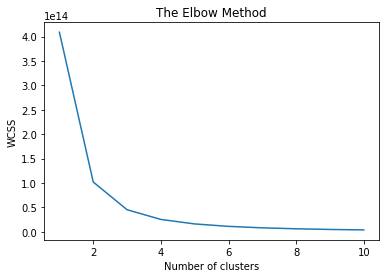

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [37]:
input = df[df['name'] == 'Dancing Queen ABBA']

In [38]:
print(input)

        acousticness                name  ...  song_id  cluster_no
297595         0.382  Dancing Queen ABBA  ...   100512           2
297596         0.168  Dancing Queen ABBA  ...    51888           1
297597         0.175  Dancing Queen ABBA  ...    44711           1

[3 rows x 15 columns]


In [39]:
n_input = input.iloc[0,:]

In [42]:
print(n_input)

acousticness             0.382
danceability             0.539
tempo               0.00202263
loudness           -0.00124698
energy                   0.884
instrumentalness       0.00166
key                          9
liveness                  0.76
popularity                  72
speechiness             0.0403
valence                  0.752
year                      1976
song_id                 100512
cluster_no                   2
Name: 297595, dtype: object


In [ ]:
n_input.drop('name', axis = 0, inplace=True)

In [45]:
n_input.drop('cluster_no', axis = 0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
def cluster_predict(input):
  prediction = kmeans.predict(input)
  return prediction 

In [46]:
pred = kmeans.predict([n_input])

In [28]:
pred[0]

0

In [29]:
print(y_kmeans)

[0 0 1 ... 1 4 2]


In [18]:
df['cluster_no'] = y_kmeans

In [19]:
df.head()

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id,cluster_no
0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.1950,0.563,10.0,0.1510,0.0,0.0506,0.7790,1928.0,140959,0
1,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,141059,0
2,0.994,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901,8.0,0.0763,0.0,0.0462,0.0767,1928.0,60998,1
3,0.604,Chapter 1.18 - Zamek kaniowski Seweryn Goszczy...,0.749,0.002150,-0.003805,0.2200,0.000,5.0,0.1190,0.0,0.9290,0.8800,1928.0,141124,0
4,0.995,Bebamos Juntos - Instrumental (Remasterizado) ...,0.781,0.002167,-0.002814,0.1300,0.887,1.0,0.1110,0.0,0.0926,0.7200,1928.0,141446,0


In [ ]:
df.dtypes

acousticness        float64
name                 object
danceability        float64
tempo               float64
loudness            float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
popularity          float64
speechiness         float64
valence             float64
year                float64
userid              float64
song_id               int64
playcount           float64
cluster_no            int32
dtype: object

In [54]:
df.describe()

,acousticness,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id,cluster_no
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.002346,-0.002171,0.488593,0.161937,5.200519,0.206690,31.556610,0.094058,0.532095,1977.223231,84954.000000,1.998211
std,0.376627,0.175346,0.000616,0.001082,0.267390,0.309329,3.515257,0.176796,21.582614,0.149937,0.262408,25.593168,49048.647781,1.416375
min,0.000000,0.000000,0.000000,-0.011458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000,0.000000
25%,0.094500,0.417000,0.001876,-0.002763,0.263000,0.000000,2.000000,0.098400,12.000000,0.034900,0.322000,1957.000000,42477.000000,1.000000
50%,0.492000,0.548000,0.002303,-0.002000,0.481000,0.000204,5.000000,0.135000,33.000000,0.045000,0.544000,1978.000000,84954.000000,2.000000
75%,0.888000,0.667000,0.002723,-0.001359,0.710000,0.086800,8.000000,0.263000,48.000000,0.075400,0.749000,1999.000000,127431.000000,3.000000
max,0.996000,0.988000,0.004897,0.000736,1.000000,1.000000,11.000000,1.000000,100.000000,0.969000,1.000000,2020.000000,169908.000000,4.000000


In [32]:
def recommend(song):
  predicted_cluster = cluster_predict(song)
  cluster_df = df[df['cluster_no'] == predicted_cluster[0]]
  return cluster_df

In [47]:
result = recommend([n_input])

In [53]:
result.iloc[5600:5620, 1]

106654    Mrs. Parker Of K.C. (Bird's Mother) Eric Dolph...
106655                         Samba De Orfeu Charlie Rouse
106683                              Dreamin Johnny Burnette
106716           John Brown - Witmark Demo - 1963 Bob Dylan
106717                             Stand by Me Cassius Clay
106718      Waiting In Vain James Brown & The Famous Flames
106719    Ballad Of Ole' Betsy - Remastered 2001 The Bea...
106720                       Long Black Train Lee Hazlewood
106754        My Heart Has A Mind Of Its Own Connie Francis
106755      I Shall Be Free - Witmark Demo - 1963 Bob Dylan
106756    The United States Air Force (or, The Army Air ...
106757    God Bless America Irving Berlin & Mormon Taber...
106759     The End of the World Percy Faith & His Orchestra
106760                          Tea for Two Thelonious Monk
106761                                              真可惜 張淑美
106762    Black Denim Trousers & Motorcycle Boots The Ch...
106763                  Sao Paulo - Rema

In [50]:
result.shape

(33881, 15)

In [ ]:
X.shape

(1135383, 15)

In [20]:
cluster_0 = df[df['cluster_no'] == 0]
cluster_1 = df[df['cluster_no'] == 1]
cluster_2 = df[df['cluster_no'] == 2]
cluster_3 = df[df['cluster_no'] == 3]
cluster_4 = df[df['cluster_no'] == 4]

In [ ]:
cluster_0.head()

In [22]:
X_0 = cluster_0.copy()

In [24]:
X_0.drop(['name','cluster_no'], axis = 1, inplace=True)

In [25]:
sub_pred_0 = kmeans.fit_predict(X_0)

In [28]:
print(sub_pred_0)

[4 4 4 ... 0 1 0]


In [27]:
cluster_0['sub_cluster'] = sub_pred_0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cluster_0.head()

In [ ]:
cluster_0[cluster_0['sub_cluster'] == 3]

In [32]:
X_1 = cluster_1.copy()

In [33]:
X_1.drop(['name','cluster_no'], axis = 1, inplace=True)

In [34]:
sub_pred_1 = kmeans.fit_predict(X_1)

In [35]:
cluster_1['sub_cluster'] = sub_pred_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
cluster_1[cluster_1['sub_cluster'] == 2]

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id,cluster_no,sub_cluster
2,0.9940,"Fantasiestücke, Op. 111: Più tosto lento Rober...",0.379,0.001685,-0.005434,0.0135,0.901000,8.0,0.0763,0.0,0.0462,0.0767,1928.0,60998,1,2
9,0.9900,"Polonaise-Fantaisie in A-Flat Major, Op. 61 Fr...",0.301,0.002674,-0.004113,0.1370,0.857000,11.0,0.8770,0.0,0.0352,0.0561,1928.0,64237,1,2
95,0.9930,"Barcarolle, Op. 60 Frédéric Chopin & Vladimir ...",0.267,0.001433,-0.003669,0.0993,0.889000,1.0,0.1060,0.0,0.0399,0.0631,1928.0,63863,1,2
509,0.9950,Anathema Se Lohage Mixalis Kalergis,0.448,0.002962,-0.002879,0.2010,0.562000,9.0,0.1840,0.0,0.0928,0.7510,1940.0,61078,1,2
510,0.5600,Часть 35.2 - По ком звонит колокол Эрнест Хеми...,0.711,0.002605,-0.004008,0.1330,0.000000,11.0,0.3450,0.0,0.9500,0.7070,1940.0,61081,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660593,0.4100,LOVE AGAIN Daniel Caesar & Brandy,0.553,0.001545,-0.001224,0.4410,0.000003,5.0,0.1070,68.0,0.0918,0.5250,2019.0,63745,1,2
660661,0.2540,Used to be (L.O.V.E.) Chelsea Collins,0.554,0.001578,-0.000455,0.7490,0.000000,9.0,0.0785,66.0,0.0533,0.3400,2020.0,67201,1,2
660668,0.2620,How Long Will I Love You Ellie Goulding,0.453,0.002521,-0.001628,0.3160,0.000894,0.0,0.1350,3.0,0.0316,0.1770,2020.0,67733,1,2
660671,0.0946,Lonely Joel Corry,0.697,0.002488,-0.000818,0.9210,0.000019,5.0,0.1590,81.0,0.0424,0.7220,2020.0,61342,1,2


In [38]:
X_2 = cluster_2.copy()

In [39]:
X_2.drop(['name','cluster_no'], axis = 1, inplace=True)

In [40]:
sub_pred_2 = kmeans.fit_predict(X_2)

In [41]:
cluster_2['sub_cluster'] = sub_pred_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
cluster_2[cluster_2['sub_cluster'] == 1]cluster_2[cluster_2['sub_cluster'] == 1]

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id,cluster_no,sub_cluster
54,0.9930,"Sonata, Op. 14, No. 3 in F Minor: I. Allegro a...",0.280,0.001627,-0.004957,0.0436,0.885000,8.0,0.0865,0.0,0.0393,0.1820,1928.0,101512,2,1
72,0.9930,"Sonata No. 3, Op. 46: II. Andante cantabile Dm...",0.372,0.001188,-0.004337,0.0945,0.941000,10.0,0.1890,0.0,0.0317,0.0791,1928.0,98782,2,1
99,0.9940,"Barcarolle, Op. 60 Frédéric Chopin & Vladimir ...",0.245,0.001346,-0.004559,0.0364,0.872000,6.0,0.1910,0.0,0.0366,0.0495,1928.0,95299,2,1
111,0.9890,"Humoreske, Op. 20: Intermezzo Robert Schumann ...",0.368,0.002576,-0.004152,0.1240,0.892000,0.0,0.1050,0.0,0.0371,0.2660,1928.0,96821,2,1
214,0.9770,Siete Lágrimas - Remasterizado Ignacio Corsini,0.660,0.002163,-0.003342,0.2150,0.000006,5.0,0.7820,0.0,0.0938,0.5610,1930.0,94984,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660529,0.0563,Sleepless Nights (feat. Nightly) ayokay & Nightly,0.663,0.002808,-0.001145,0.6960,0.000006,11.0,0.2260,64.0,0.0349,0.4490,2018.0,101065,2,1
660586,0.1450,6's to 9's (feat. Rationale) Big Wild & Rationale,0.714,0.001916,-0.001107,0.6630,0.000000,8.0,0.2640,66.0,0.0694,0.6400,2019.0,96970,2,1
660619,0.0263,Beautiful Nightmare Lil Tracy,0.675,0.001555,-0.001538,0.6300,0.000000,4.0,0.2840,68.0,0.0720,0.2230,2019.0,98708,2,1
660649,0.4280,Thug Love A Boogie Wit da Hoodie,0.540,0.003574,-0.000899,0.6430,0.000000,5.0,0.1740,67.0,0.2880,0.3280,2020.0,100235,2,1


In [44]:
X_3 = cluster_3.copy()

In [45]:
X_3.drop(['name','cluster_no'], axis = 1, inplace=True)

In [46]:
sub_pred_3 = kmeans.fit_predict(X_3)

In [47]:
cluster_3['sub_cluster'] = sub_pred_3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
cluster_3[cluster_3['sub_cluster'] == 3]

,acousticness,name,danceability,tempo,loudness,energy,instrumentalness,key,liveness,popularity,speechiness,valence,year,song_id,cluster_no,sub_cluster
42,0.9750,"Andante spianato in E-Flat Major, Op. 22 Frédé...",0.277,0.002107,-0.005001,0.0900,0.949000,7.0,0.1250,0.0,0.0316,0.1680,1928.0,28031,3,3
131,0.9900,"Piano Sonata No. 2, Op. 35: I. Grave - Doppio ...",0.245,0.001822,-0.003264,0.2640,0.893000,10.0,0.0785,2.0,0.0371,0.0746,1928.0,28004,3,3
828,0.9850,Habanera from Carmen - Voice Georges Bizet & G...,0.349,0.001565,-0.003864,0.1690,0.000001,7.0,0.2150,14.0,0.1640,0.2130,1949.0,29229,3,3
1399,0.9850,"Sonata for Violin and Piano No. 1 in D Major, ...",0.364,0.002481,-0.004440,0.0552,0.537000,2.0,0.0946,0.0,0.0438,0.3180,1949.0,32282,3,3
1402,0.9690,"Carmen: Act IV: Dansez, dansez Georges Bizet &...",0.360,0.003470,-0.001939,0.5120,0.036700,7.0,0.3100,0.0,0.0619,0.6870,1951.0,29332,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660644,0.0258,Payroll (feat. Payroll Giovanni) Tee Grizzley ...,0.587,0.002601,-0.001498,0.6250,0.000008,1.0,0.1110,66.0,0.3400,0.1400,2020.0,29000,3,3
660648,0.1730,Prices Lil Uzi Vert,0.786,0.002528,-0.001031,0.6830,0.000000,7.0,0.7060,66.0,0.2050,0.5700,2020.0,31011,3,3
660657,0.0508,Posthumous Forgiveness Tame Impala,0.367,0.003089,-0.001078,0.6130,0.001710,7.0,0.2820,69.0,0.0297,0.0966,2020.0,32412,3,3
660665,0.9730,I Know You Care Ellie Goulding,0.415,0.002124,-0.002393,0.2620,0.000003,9.0,0.1060,2.0,0.0333,0.3110,2020.0,30939,3,3


In [50]:
X_4 = cluster_4.copy()

In [51]:
X_4.drop(['name','cluster_no'], axis = 1, inplace=True)

In [52]:
sub_pred_4 = kmeans.fit_predict(X_4)

In [53]:
cluster_4['sub_cluster'] = sub_pred_4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cluster_4[cluster_4['sub_cluster'] == 3]

In [ ]:
cluster_00 = cluster_0[cluster_0['sub_cluster'] == 0]
cluster_01 = cluster_0[cluster_0['sub_cluster'] == 1]
cluster_02 = cluster_0[cluster_0['sub_cluster'] == 2]
cluster_03 = cluster_0[cluster_0['sub_cluster'] == 3]
cluster_04 = cluster_0[cluster_0['sub_cluster'] == 4]
cluster_10 = cluster_1[cluster_0['sub_cluster'] == 0]
cluster_11 = cluster_1[cluster_0['sub_cluster'] == 1]
cluster_12 = cluster_1[cluster_0['sub_cluster'] == 2]
cluster_13 = cluster_1[cluster_0['sub_cluster'] == 3]
cluster_14 = cluster_1[cluster_0['sub_cluster'] == 4]
cluster_20 = cluster_2[cluster_0['sub_cluster'] == 0]
cluster_21 = cluster_2[cluster_0['sub_cluster'] == 1]
cluster_22 = cluster_2[cluster_0['sub_cluster'] == 2]
cluster_23 = cluster_2[cluster_0['sub_cluster'] == 3]
cluster_24 = cluster_2[cluster_0['sub_cluster'] == 4]
cluster_30 = cluster_3[cluster_0['sub_cluster'] == 0]
cluster_31 = cluster_3[cluster_0['sub_cluster'] == 1]
cluster_32 = cluster_3[cluster_0['sub_cluster'] == 2]
cluster_33 = cluster_3[cluster_0['sub_cluster'] == 3]
cluster_34 = cluster_3[cluster_0['sub_cluster'] == 4]
cluster_40 = cluster_4[cluster_0['sub_cluster'] == 0]
cluster_41 = cluster_4[cluster_0['sub_cluster'] == 1]
cluster_42 = cluster_4[cluster_0['sub_cluster'] == 2]
cluster_43 = cluster_4[cluster_0['sub_cluster'] == 3]
cluster_44 = cluster_4[cluster_0['sub_cluster'] == 4]